In [46]:
import matplotlib.pyplot as plt
import numpy as np
import yt
import pickle
from astropy import units as u, constants  as const

pc = const.pc.cgs.value
kB  = const.k_B.cgs.value
Msun = const.M_sun.cgs.value
G = const.G.cgs.value
Myr = u.Myr.in_units("s")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})

K_to_keV = 8.61732814974057e-8
K_to_keV = 8.625e-8

In [47]:
# load data
with open("datafiles/all_data_active.pkl", "rb") as f:
    data = pickle.load(f)

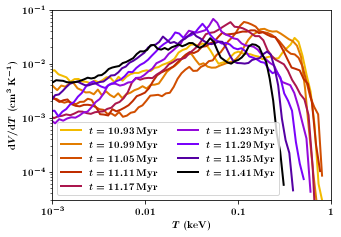

In [57]:
i0 = 1094
i1 = 1144
di = 6
N = len(np.arange(i0,i1,di))
colors = plt.cm.gnuplot_r(np.linspace(0.1, 1.0, N))
data.keys()
fig, ax = plt.subplots(figsize=(5,3.5))
for i, f in enumerate(np.arange(i0,i1,di)):
    #idx = np.where(np.cumsum(data[f]["HT"]) / np.sum(data[f]["HT"]) > 0.5)[0]
    #med = np.mean(data[f]["T"][idx])
    ax.semilogy(data[f]["T"], data[f]["HT"], label="$t="+str(np.round(data[f]["time"],2))+"\\,\\mathrm{Myr}$", color=colors[i], lw=2)
    #ax.plot([np.log10(data[f]["medT"]),np.log10(data[f]["medT"])],[1e-4,1e-1],ls="--",color=colors[i])
ax.set_xlabel("$T~(\\mathrm{keV})$")
ax.set_ylabel("$\\mathrm{d}V/\\mathrm{d}T~(\\mathrm{cm}^{3}\\,\\mathrm{K}^{-1})$")
ax.set_ylim(3e-5,1e-1)
ax.set_xlim(-3,0)
ax.set_xticks([-3,-2,-1,0])
ax.set_xticklabels(["$10^{-3}$", "$0.01$", "$0.1$", "$1$"])
ax.legend(ncol=2, loc="lower left")
#ax.plot([np.log10(T_med),np.log10(T_med)],[1e-4,1e-1],ls="--",color="C0")
#ax.text(-2.8, 5e-2, "$\\mathrm{median}(T) = "+str(np.round(T_med,3))+"\\,\\mathrm{keV}$",color="C0")
fig.savefig("plots/temperature-pdf-time-evol.pdf", bbox_inches="tight")